# 4. Data Visualization I 

1. Use the inbuilt dataset 'titanic'. The dataset contains 891 rows and contains information 
about the passengers who boarded the unfortunate Titanic ship. Use the Seaborn library 
to see if we can find any patterns in the data.
2. Write a code to check how the price of the ticket (column name: 'fare') for each
 passenger is distributed by plotting a histogram.
 
The objective is to predict the value of prices of the house using the given features.


In [29]:
import numpy as np
import pandas as pd
import seaborn as sns

## 4.1. Preprocessing


### 4.1.1. Structure of the dataset

```
survival	Survival	0 = No, 1 = Yes
pclass      Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
```

In [30]:
ds = pd.read_csv( "titanic.csv" )
print( ds.shape )
ds.describe()

(891, 12)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
ds.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### 4.1.2. Correcting data-types

In [32]:
ds = ds.astype( { 
    "Name": "string" , 
    "Sex": "string" , 
    "Ticket": "string"  , 
    "Cabin": "string"  , 
    "Embarked": "string"  , 
} )
ds.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            string
Sex             string
Age            float64
SibSp            int64
Parch            int64
Ticket          string
Fare           float64
Cabin           string
Embarked        string
dtype: object

### 4.1.3. Handling missing values

In [33]:
# Check number of missing values
ds.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


<AxesSubplot:xlabel='Age', ylabel='Count'>

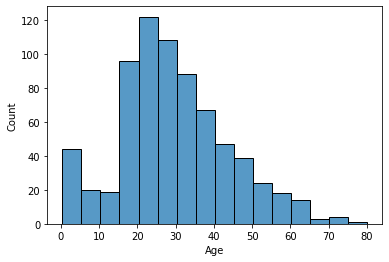

In [34]:
# Check statistics of columns with missing values
print( ds[ "Age" ].describe() )
sns.histplot( data=ds , x="Age" , bins=16 )

## 4.2. Exploratory Data Analysis

<AxesSubplot:xlabel='Pclass', ylabel='count'>

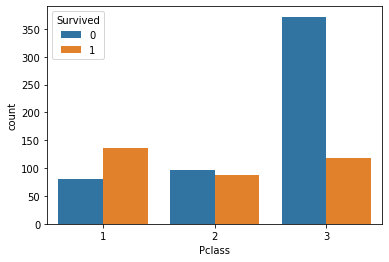

In [44]:
sns.countplot( data=ds , x="Pclass" , hue="Survived" )

<AxesSubplot:xlabel='Sex', ylabel='count'>

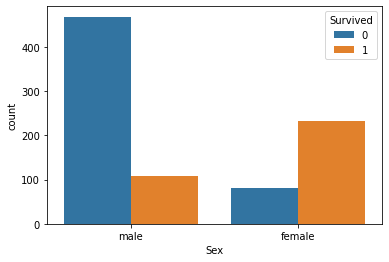

In [45]:
sns.countplot( data=ds , x="Sex" , hue="Survived" )

<AxesSubplot:xlabel='Survived', ylabel='Age'>

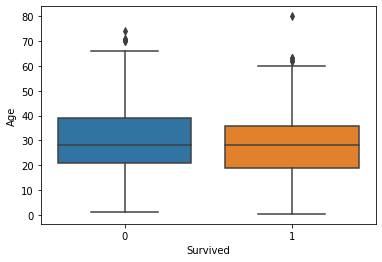

In [47]:
sns.boxplot( data=ds , x="Survived" , y="Age" )

<AxesSubplot:xlabel='Embarked', ylabel='count'>

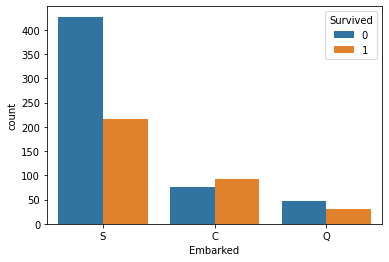

In [48]:
sns.countplot( data=ds , x="Embarked" , hue="Survived" )